## Plot Context_Size and Latency relation

In [7]:
import pandas as pd
import re

# Load the CSV content into a DataFrame
data = {
    "Context Size": [2, 4],
    "Eval Time Line": [
        "llama_print_timings:        eval time =    2823.29 ms /    24 runs   (  117.64 ms per token,     8.50 tokens per second)",
        "llama_print_timings:        eval time =    2828.25 ms /    24 runs   (  117.84 ms per token,     8.49 tokens per second)"
    ]
}
df = pd.DataFrame(data)

# Function to extract the token-per-second value
def extract_tokens_per_second(eval_time_line):
    match = re.search(r'(\d+\.\d+) tokens per second', eval_time_line)
    if match:
        return float(match.group(1))
    return None

# Apply the function to extract the token-per-second value for each row
df['Tokens Per Second'] = df['Eval Time Line'].apply(extract_tokens_per_second)

# Create a new DataFrame with only the required columns
df_filtered = df[['Context Size', 'Tokens Per Second']]

file_path = './Context_Size_and_Tokens_per_Second.csv'
df_filtered.to_csv(file_path, index=False)
print(f"File saved to: {file_path}")





File saved to: ./Context_Size_and_Tokens_per_Second.csv


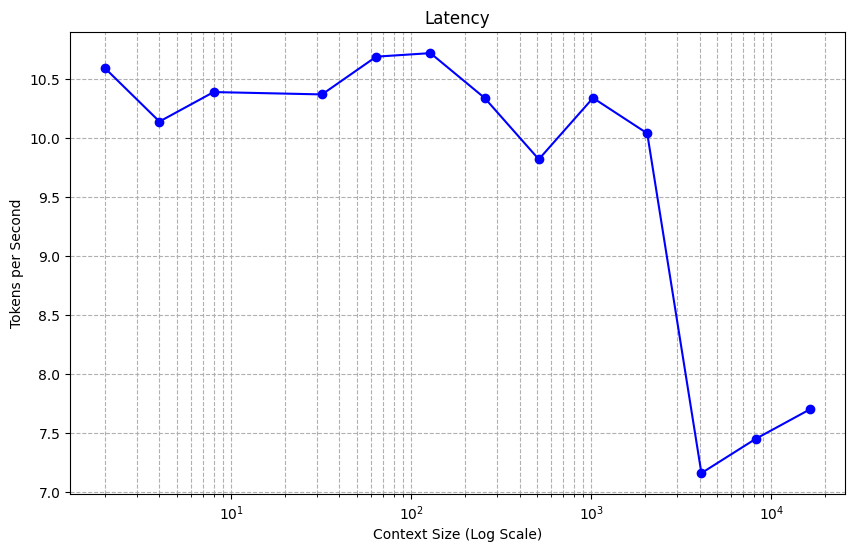

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有一個 CSV 檔案 'Context_Size_and_Tokens_per_Second.csv'
df = pd.read_csv('Context_Size_and_Tokens_per_Second.csv')

# 繪製圖表，將 Context Size 設為 log 尺度
plt.figure(figsize=(10, 6))
plt.plot(df['Context Size'], df['Tokens per Second'], marker='o', linestyle='-', color='b')
plt.xscale('log')  # 設定 X 軸為 log 尺度
plt.title('Latency')
plt.xlabel('Context Size (Log Scale)')
plt.ylabel('Tokens per Second')
plt.grid(True, which="both", ls="--")

# 顯示圖表
plt.show()
